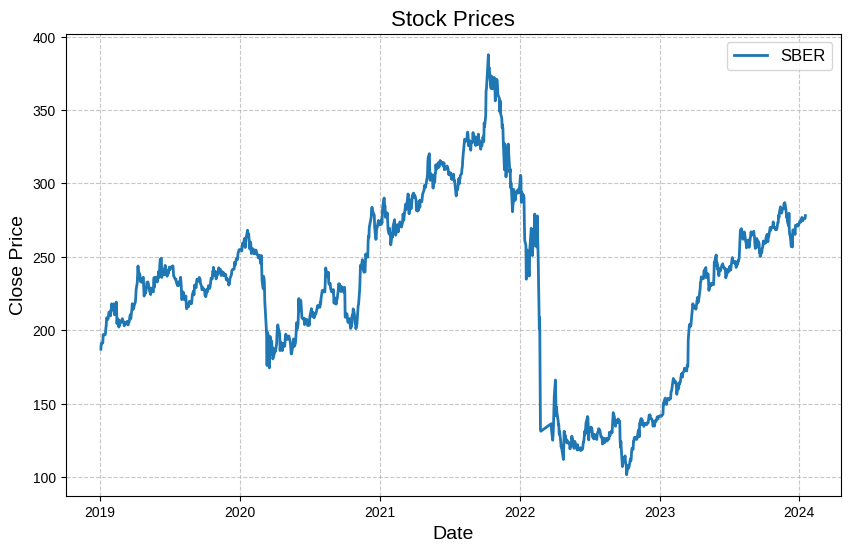

,ticker,per,date,time,open,high,low,close,vol
0,SBER,D,2019-01-03,0,186.37,191.50,186.00,186.99,40105780
1,SBER,D,2019-01-04,0,187.99,190.99,187.77,190.99,32537090
2,SBER,D,2019-01-08,0,191.66,193.18,190.37,191.24,38581950
3,SBER,D,2019-01-09,0,192.71,197.00,192.10,197.00,70633230
4,SBER,D,2019-01-10,0,196.30,197.64,195.03,196.75,56211650
...,...,...,...,...,...,...,...,...,...
1251,SBER,D,2024-01-11,0,274.62,275.97,274.01,275.71,19520470
1252,SBER,D,2024-01-12,0,275.90,276.96,274.77,275.84,17608350
1253,SBER,D,2024-01-15,0,276.30,277.73,275.21,275.96,21283290
1254,SBER,D,2024-01-16,0,276.24,276.45,274.10,276.01,16084140


In [1]:
from stocks_parser import StockParser

stock_parser = StockParser(['SBER'],start_date = '2019-02-01', end_date = '2024-01-17')
stock_parser.parse_stocks()
stock_parser.plot_stock_data()
stock_data = stock_parser.get_stocks_dataframe()
stock_data=stock_data['SBER']
stock_data_no_dublicates = stock_data.drop_duplicates(subset='date', keep='last')
stock_data

In [2]:
import pandas as pd

# Пример данных
data = {'filtered_content': [['Акции Сбербанка', 'в понедельник подорожали на '],
                             ['Другие акции', 'текст еще']],
        'other_column': [1, 2]}

df = pd.DataFrame(data)

# Объединение элементов списка в столбце 'filtered_content'
df['merged_content'] = df['filtered_content'].apply(lambda x: '; '.join(x))

# Удаление столбца 'filtered_content', если нужно
df = df.drop(columns=['filtered_content'])

# Вывод результата
print(df['merged_content'])


0    Акции Сбербанка; в понедельник подорожали на 
1                          Другие акции; текст еще
Name: merged_content, dtype: object


In [3]:
import pandas as pd
import re
def join_lists(row):
    return ' '.join(row)
news_data = pd.read_csv('../SBER_news_in_crashed.csv')
news_data_no_duplicates = news_data.drop_duplicates(subset='date', keep='last')
news_data_no_duplicates['date'] = pd.to_datetime(news_data_no_duplicates['date'])

news_data_no_duplicates

/tmp/ipykernel_73488/2019942218.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data_no_duplicates['date'] = pd.to_datetime(news_data_no_duplicates['date'])


,date,title,content,filtered_content
1,2024-01-17,Сбербанк. Не удалось обновить январские максимумы,"Акции Сбербанка в понедельник подорожали на 0,...",['Акции Сбербанка в понедельник подорожали на ...
2,2024-01-16,"Сбербанк. Сбавили темпы, но краткосрочный трен...","Акции Сбербанка в пятницу подорожали на 0,05%,...","['Акции Сбербанка в пятницу подорожали на 0,05..."
3,2024-01-12,Сбербанк. Пока не расторговались,"Акции Сбербанка в четверг подорожали на 0,44%,...","['Акции Сбербанка в четверг подорожали на 0,44..."
4,2024-01-11,Сбербанк. Может протестировать 200-часовую сре...,"Акции Сбербанка в среду подешевели на 0,29%, д...","['Акции Сбербанка в среду подешевели на 0,29%,..."
7,2024-01-10,Сбербанк. Откат на низких оборотах,"Акции Сбербанка во вторник подешевели на 0,53%...","['Акции Сбербанка во вторник подешевели на 0,5..."
...,...,...,...,...
2438,2019-03-19,Сбербанк. Пробит локальный нисходящий тренд,Итоги торгов\nНа предыдущей торговой сессии ак...,['Итоги торгов\nНа предыдущей торговой сессии ...
2441,2019-03-18,Сбербанк. Остановились на поддержке в месячном...,Итоги торгов\nНа предыдущей торговой сессии ак...,['Итоги торгов\nНа предыдущей торговой сессии ...
2443,2019-03-15,Сбербанк. Сегодня можем протестировать поддерж...,Итоги торгов\nВ предыдущий торговый день акции...,['Итоги торгов\nВ предыдущий торговый день акц...
2445,2019-03-14,Сбербанк. На младших таймфреймах появились при...,Итоги торгов\nВ предыдущий торговый день акции...,['Итоги торгов\nВ предыдущий торговый день акц...


In [4]:
import re

# Define the list of special characters to remove
special_characters = ['[', ']', '\'', '\\xa', '\\n', '•']

# Iterate over each special character and replace it with an empty string
for char in special_characters:
    news_data_no_duplicates['filtered_content'] = news_data_no_duplicates['filtered_content'].str.replace(re.escape(char), ' ')

# Optionally, you can remove any extra spaces resulting from the replacements
news_data_no_duplicates['filtered_content'] = news_data_no_duplicates['filtered_content'].str.strip()
news_data_no_duplicates

/tmp/ipykernel_73488/3599104979.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  news_data_no_duplicates['filtered_content'] = news_data_no_duplicates['filtered_content'].str.replace(re.escape(char), ' ')
/tmp/ipykernel_73488/3599104979.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data_no_duplicates['filtered_content'] = news_data_no_duplicates['filtered_content'].str.replace(re.escape(char), ' ')
/tmp/ipykernel_73488/3599104979.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

,date,title,content,filtered_content
1,2024-01-17,Сбербанк. Не удалось обновить январские максимумы,"Акции Сбербанка в понедельник подорожали на 0,...","Акции Сбербанка в понедельник подорожали на 0,..."
2,2024-01-16,"Сбербанк. Сбавили темпы, но краткосрочный трен...","Акции Сбербанка в пятницу подорожали на 0,05%,...","Акции Сбербанка в пятницу подорожали на 0,05%,..."
3,2024-01-12,Сбербанк. Пока не расторговались,"Акции Сбербанка в четверг подорожали на 0,44%,...","Акции Сбербанка в четверг подорожали на 0,44%,..."
4,2024-01-11,Сбербанк. Может протестировать 200-часовую сре...,"Акции Сбербанка в среду подешевели на 0,29%, д...","Акции Сбербанка в среду подешевели на 0,29%, д..."
7,2024-01-10,Сбербанк. Откат на низких оборотах,"Акции Сбербанка во вторник подешевели на 0,53%...","Акции Сбербанка во вторник подешевели на 0,53%..."
...,...,...,...,...
2438,2019-03-19,Сбербанк. Пробит локальный нисходящий тренд,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии акц...
2441,2019-03-18,Сбербанк. Остановились на поддержке в месячном...,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии акц...
2443,2019-03-15,Сбербанк. Сегодня можем протестировать поддерж...,Итоги торгов\nВ предыдущий торговый день акции...,Итоги торгов В предыдущий торговый день акции ...
2445,2019-03-14,Сбербанк. На младших таймфреймах появились при...,Итоги торгов\nВ предыдущий торговый день акции...,Итоги торгов В предыдущий торговый день акции ...


In [5]:
import pandas as pd

# Пример данных
data = {'filtered_content': [['Акции Сбербанка', 'в\\xa понедельник подорожали на '],
                             ['Другие акции', 'текст с [спецсимволами]']],
        'other_column': [1, 2]}

df = pd.DataFrame(data)

# Удаление спецсимволов из столбца 'filtered_content'
df['filtered_content'] = df['filtered_content'].apply(lambda x: [re.sub(r'[\[\]\'\\xa\\n•]', '', item) for item in x])

# Вывод результата
print(df['filtered_content'])


0    [Акции Сбербанка, в понедельник подорожали на ]
1              [Другие акции, текст с спецсимволами]
Name: filtered_content, dtype: object


In [6]:
merged_df = pd.merge(stock_data_no_dublicates,news_data_no_duplicates, on='date', how='left')
merged_df

,ticker,per,date,time,open,high,low,close,vol,title,content,filtered_content
0,SBER,D,2019-01-03,0,186.37,191.50,186.00,186.99,40105780,NaN,NaN,NaN
1,SBER,D,2019-01-04,0,187.99,190.99,187.77,190.99,32537090,NaN,NaN,NaN
2,SBER,D,2019-01-08,0,191.66,193.18,190.37,191.24,38581950,NaN,NaN,NaN
3,SBER,D,2019-01-09,0,192.71,197.00,192.10,197.00,70633230,NaN,NaN,NaN
4,SBER,D,2019-01-10,0,196.30,197.64,195.03,196.75,56211650,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1251,SBER,D,2024-01-11,0,274.62,275.97,274.01,275.71,19520470,Сбербанк. Может протестировать 200-часовую сре...,"Акции Сбербанка в среду подешевели на 0,29%, д...","Акции Сбербанка в среду подешевели на 0,29%, д..."
1252,SBER,D,2024-01-12,0,275.90,276.96,274.77,275.84,17608350,Сбербанк. Пока не расторговались,"Акции Сбербанка в четверг подорожали на 0,44%,...","Акции Сбербанка в четверг подорожали на 0,44%,..."
1253,SBER,D,2024-01-15,0,276.30,277.73,275.21,275.96,21283290,NaN,NaN,NaN
1254,SBER,D,2024-01-16,0,276.24,276.45,274.10,276.01,16084140,"Сбербанк. Сбавили темпы, но краткосрочный трен...","Акции Сбербанка в пятницу подорожали на 0,05%,...","Акции Сбербанка в пятницу подорожали на 0,05%,..."


In [7]:
merged_df['rolling_mean_30'] = merged_df['close'].rolling(window=30).mean()

# Calculate the daily increments
merged_df['daily_increment'] = merged_df['close'].diff()
merged_df

,ticker,per,date,time,open,high,low,close,vol,title,content,filtered_content,rolling_mean_30,daily_increment
0,SBER,D,2019-01-03,0,186.37,191.50,186.00,186.99,40105780,NaN,NaN,NaN,NaN,NaN
1,SBER,D,2019-01-04,0,187.99,190.99,187.77,190.99,32537090,NaN,NaN,NaN,NaN,4.00
2,SBER,D,2019-01-08,0,191.66,193.18,190.37,191.24,38581950,NaN,NaN,NaN,NaN,0.25
3,SBER,D,2019-01-09,0,192.71,197.00,192.10,197.00,70633230,NaN,NaN,NaN,NaN,5.76
4,SBER,D,2019-01-10,0,196.30,197.64,195.03,196.75,56211650,NaN,NaN,NaN,NaN,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,SBER,D,2024-01-11,0,274.62,275.97,274.01,275.71,19520470,Сбербанк. Может протестировать 200-часовую сре...,"Акции Сбербанка в среду подешевели на 0,29%, д...","Акции Сбербанка в среду подешевели на 0,29%, д...",269.883667,1.22
1252,SBER,D,2024-01-12,0,275.90,276.96,274.77,275.84,17608350,Сбербанк. Пока не расторговались,"Акции Сбербанка в четверг подорожали на 0,44%,...","Акции Сбербанка в четверг подорожали на 0,44%,...",269.851667,0.13
1253,SBER,D,2024-01-15,0,276.30,277.73,275.21,275.96,21283290,NaN,NaN,NaN,269.800333,0.12
1254,SBER,D,2024-01-16,0,276.24,276.45,274.10,276.01,16084140,"Сбербанк. Сбавили темпы, но краткосрочный трен...","Акции Сбербанка в пятницу подорожали на 0,05%,...","Акции Сбербанка в пятницу подорожали на 0,05%,...",269.868333,0.05


In [8]:
merged_df

,ticker,per,date,time,open,high,low,close,vol,title,content,filtered_content,rolling_mean_30,daily_increment
0,SBER,D,2019-01-03,0,186.37,191.50,186.00,186.99,40105780,NaN,NaN,NaN,NaN,NaN
1,SBER,D,2019-01-04,0,187.99,190.99,187.77,190.99,32537090,NaN,NaN,NaN,NaN,4.00
2,SBER,D,2019-01-08,0,191.66,193.18,190.37,191.24,38581950,NaN,NaN,NaN,NaN,0.25
3,SBER,D,2019-01-09,0,192.71,197.00,192.10,197.00,70633230,NaN,NaN,NaN,NaN,5.76
4,SBER,D,2019-01-10,0,196.30,197.64,195.03,196.75,56211650,NaN,NaN,NaN,NaN,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,SBER,D,2024-01-11,0,274.62,275.97,274.01,275.71,19520470,Сбербанк. Может протестировать 200-часовую сре...,"Акции Сбербанка в среду подешевели на 0,29%, д...","Акции Сбербанка в среду подешевели на 0,29%, д...",269.883667,1.22
1252,SBER,D,2024-01-12,0,275.90,276.96,274.77,275.84,17608350,Сбербанк. Пока не расторговались,"Акции Сбербанка в четверг подорожали на 0,44%,...","Акции Сбербанка в четверг подорожали на 0,44%,...",269.851667,0.13
1253,SBER,D,2024-01-15,0,276.30,277.73,275.21,275.96,21283290,NaN,NaN,NaN,269.800333,0.12
1254,SBER,D,2024-01-16,0,276.24,276.45,274.10,276.01,16084140,"Сбербанк. Сбавили темпы, но краткосрочный трен...","Акции Сбербанка в пятницу подорожали на 0,05%,...","Акции Сбербанка в пятницу подорожали на 0,05%,...",269.868333,0.05


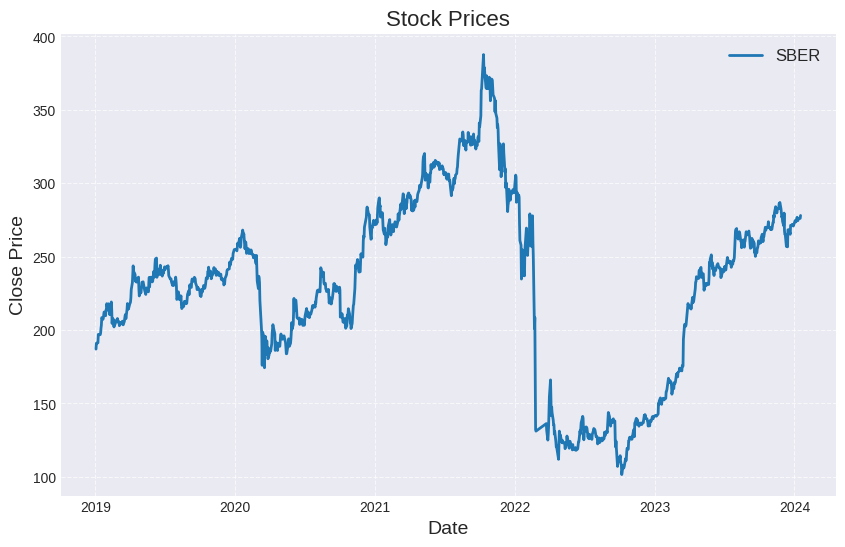

,ticker,per,date,time,open,high,low,close,vol
0,SBER,D,2019-01-03,0,186.37,191.50,186.00,186.99,40105780
1,SBER,D,2019-01-04,0,187.99,190.99,187.77,190.99,32537090
2,SBER,D,2019-01-08,0,191.66,193.18,190.37,191.24,38581950
3,SBER,D,2019-01-09,0,192.71,197.00,192.10,197.00,70633230
4,SBER,D,2019-01-10,0,196.30,197.64,195.03,196.75,56211650
...,...,...,...,...,...,...,...,...,...
1251,SBER,D,2024-01-11,0,274.62,275.97,274.01,275.71,19520470
1252,SBER,D,2024-01-12,0,275.90,276.96,274.77,275.84,17608350
1253,SBER,D,2024-01-15,0,276.30,277.73,275.21,275.96,21283290
1254,SBER,D,2024-01-16,0,276.24,276.45,274.10,276.01,16084140


In [9]:
from stocks_parser import StockParser

stock_parser = StockParser(['SBER'],start_date = '2019-02-01', end_date = '2024-01-17')
stock_parser.parse_stocks()
stock_parser.plot_stock_data()
stock_data = stock_parser.get_stocks_dataframe()
stock_data=stock_data['SBER']
stock_data = stock_data.drop_duplicates(subset='date', keep='last')
stock_data

In [10]:
import pandas as pd

data = pd.read_csv('../SBER_news_in_crashed.csv')
data = data.drop_duplicates(subset='date', keep='first')
import re

# Define the list of special characters to remove
special_characters = ['[', ']', '\'', '\\xa', '\\n', '•']

# Iterate over each special character and replace it with an empty string
for char in special_characters:
    data['filtered_content'] = data['filtered_content'].str.replace(re.escape(char), ' ')

# Optionally, you can remove any extra spaces resulting from the replacements
data['filtered_content'] = data['filtered_content'].str.strip()
data.dropna(subset='filtered_content',inplace=True)
content = pd.read_csv('SBER_with_sentiments_full.csv')
titles = pd.read_csv('SBER_with_sentiments_titles_full.csv')
titles.columns = ['Title',	'En Title', 'Positive title',	'Negative title',	'Neutral title', 'real_score_title']
news_sentimented = pd.merge(data, content, left_on = 'filtered_content', right_on = 'Headline', how='inner')
news_sentimented = pd.merge(news_sentimented, titles, left_on = 'title', right_on = 'Title', how='inner')
news_sentimented.drop_duplicates(subset='date',inplace=True)


/tmp/ipykernel_73488/831399104.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  data['filtered_content'] = data['filtered_content'].str.replace(re.escape(char), ' ')


In [11]:
news_sentimented['date'] = pd.to_datetime(news_sentimented['date'])
ready_data = pd.merge(stock_data, news_sentimented, on= 'date', how='inner')
ready_data.drop_duplicates(inplace=True)
ready_data = ready_data[['close','real_score']]
ready_data

,close,real_score
0,206.00,0.220851
1,203.66,0.740109
2,203.55,-0.958992
3,205.90,0.037193
4,207.70,0.051956
...,...,...
1175,274.49,0.894992
1176,275.71,-0.706220
1177,275.84,0.794435
1178,276.01,0.932660


In [12]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180 entries, 0 to 1179
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   close       1180 non-null   float64
 1   real_score  1180 non-null   float64
dtypes: float64(2)
memory usage: 27.7 KB


In [13]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

class StockLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(StockLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, _ = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

class StockPredictor:
    def __init__(self):
        self.scalers = []  # Массив для хранения отдельных StandardScaler для каждого признака
        self.look_back = 30
        self.input_dim = 2
        self.hidden_dim = 32
        self.num_layers = 2
        self.output_dim = 1

    def load_data(self, train_data):
        self.scalers = []  # Обнулите массив перед использованием
        data = []
        for i in range(train_data.shape[1]):  # Цикл по каждому столбцу данных
            scaler = StandardScaler()
            train_data[:, i] = scaler.fit_transform(train_data[:, i].reshape(-1, 1)).flatten()
            self.scalers.append(scaler)

        for index in range(len(train_data) - self.look_back):
            data.append(train_data[index: index + self.look_back])
        data = np.array(data)
        print(data.shape)
        x_train = data[:, :-1, :]
        
        y_train = data[:, -1, 0].reshape(-1, 1)
        print(y_train.shape)
        self.x_train = torch.from_numpy(x_train).type(torch.Tensor)
        self.y_train = torch.from_numpy(y_train).type(torch.Tensor)

    def train_model(self, num_epochs=300):
        self.model = StockLSTM(self.input_dim, self.hidden_dim, self.num_layers, self.output_dim)
        loss_fn = torch.nn.MSELoss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=0.01)
        hist = np.zeros(num_epochs)
        for t in range(num_epochs):
            y_train_pred = self.model(self.x_train)
            loss = loss_fn(y_train_pred, self.y_train)
            hist[t] = loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if t % 10 == 0 and t != 0:
                print("Epoch ", t, "MSE: ", loss.item())
        self.trained_model = self.model
        self.history = hist

    def predict(self, test_data):
        data = []
        for i, scaler in enumerate(self.scalers):  # Цикл по каждому столбцу данных
            test_data[:, i] = scaler.transform(test_data[:, i].reshape(-1, 1)).flatten()

        for index in range(len(test_data) - self.look_back):
            data.append(test_data[index: index + self.look_back])
        data = np.array(data)
        x_test = data[:, :-1, :]
        y_test = data[:, -1, 0].reshape(-1, 1)
        self.x_test = torch.from_numpy(x_test).type(torch.Tensor)
        self.y_test = torch.from_numpy(y_test).type(torch.Tensor)

        y_test_pred = self.trained_model(self.x_test)
        
        self.predicted_values = np.zeros_like(self.y_test)
        self.predicted_values[:, 0] = self.scalers[0].inverse_transform(y_test_pred.detach().numpy().reshape(-1, 1)).flatten()
        self.y_test_original = np.zeros_like(self.y_test)
        self.y_test_original[:, 0] = self.scalers[0].inverse_transform(self.y_test.numpy().reshape(-1, 1)).flatten()



    # Остальные методы остаются без изменений
    def calculate_rmse(self):
        test_score = math.sqrt(mean_squared_error(self.y_test_original, self.predicted_values))
        print('Test Score: %.2f RMSE' % (test_score))

    def plot_results(self):
        figure, axes = plt.subplots(figsize=(15, 6))
        axes.plot(range(len(self.y_test_original)), self.y_test_original, color='red', label='Real Stock Price')
        axes.plot(range(len(self.y_test_original)), self.predicted_values, color='blue', label='Predicted Stock Price')
        plt.title('Stock Price Prediction')
        plt.xlabel('Day')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()
    
    def get_predictions_and_originals(self):
        return self.predicted_values, self.y_test_original


In [14]:

import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


predictor = StockPredictor()

train_data, test_data = train_test_split(ready_data, test_size=0.2, shuffle=False)

In [15]:
train_data

,close,real_score
0,206.00,0.220851
1,203.66,0.740109
2,203.55,-0.958992
3,205.90,0.037193
4,207.70,0.051956
...,...,...
939,151.38,-0.099346
940,153.50,0.036776
941,152.66,0.674827
942,152.81,-0.070161


In [16]:
test_data

,close,real_score
944,153.20,0.277923
945,153.38,0.893113
946,158.07,0.378257
947,158.29,0.578703
948,159.45,-0.434091
...,...,...
1175,274.49,0.894992
1176,275.71,-0.706220
1177,275.84,0.794435
1178,276.01,0.932660


In [17]:
train_data.to_numpy().shape

(944, 2)

(914, 30, 2)
(914, 1)
Epoch  10 MSE:  0.12614277005195618
Epoch  20 MSE:  0.028956830501556396
Epoch  30 MSE:  0.019436664879322052
Epoch  40 MSE:  0.016095302999019623
Epoch  50 MSE:  0.012015118263661861
Epoch  60 MSE:  0.010972600430250168
Epoch  70 MSE:  0.009997834451496601
Epoch  80 MSE:  0.009518192149698734
Epoch  90 MSE:  0.009164205752313137
Epoch  100 MSE:  0.008880275301635265
Epoch  110 MSE:  0.008627819828689098
Epoch  120 MSE:  0.00840521790087223
Epoch  130 MSE:  0.00820158887654543
Epoch  140 MSE:  0.008013464510440826
Epoch  150 MSE:  0.007838684134185314
Epoch  160 MSE:  0.007676885928958654
Epoch  170 MSE:  0.007528218440711498
Epoch  180 MSE:  0.007392953149974346
Epoch  190 MSE:  0.007271260488778353
Epoch  200 MSE:  0.007162972819060087
Epoch  210 MSE:  0.007067426107823849
Epoch  220 MSE:  0.006983415223658085
Epoch  230 MSE:  0.006909302901476622
Epoch  240 MSE:  0.008723407983779907
Epoch  250 MSE:  0.008486364036798477
Epoch  260 MSE:  0.007447907235473394
Ep

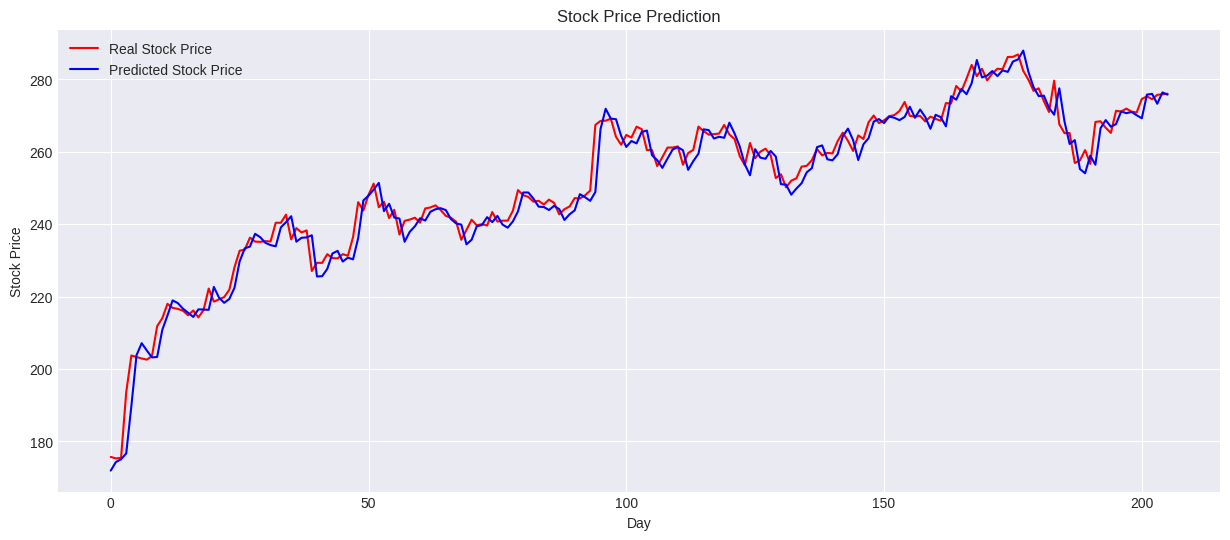

In [18]:

# # Load and train the model
predictor.load_data(train_data.to_numpy())
predictor.train_model()

# Predict and evaluate
predictor.predict( test_data.to_numpy())
predictor.calculate_rmse()
predictor.plot_results()
predicted_close, original_close = predictor.get_predictions_and_originals()